<center><h2>ASSIGNMENT-5</h2><center>

In [97]:
import numpy as np                                    # For calculation purpose
import pandas as pd                                   # For data cleanung
import matplotlib.pyplot as plt                       # For plotting
import seaborn as sns                                 # For plotting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing set
from sklearn.linear_model import LinearRegression     # To use Linera Regression
from sklearn.linear_model import LogisticRegression   # To use Logistic Regression
from sklearn.ensemble import RandomForestClassifier   # To use Random Forest Classifier Algorithm
from sklearn.feature_selection import RFE             # For feature selection
from sklearn.preprocessing import StandardScaler      # To use standard scaling to scale the data
from sklearn.preprocessing import MinMaxScaler        # To use normalized scaling
from sklearn.metrics import confusion_matrix          # To use Confusion Matrix
from sklearn.metrics import classification_report     # For classifying the model after training
from statsmodels.stats.outliers_influence import variance_inflation_factor     # To use vif in the data set

In [2]:
data = pd.read_csv("telecom_data.csv")    # For reading a csv

In [3]:
pd.set_option('max_columns',226)        # For displaying all the columns

In [4]:
data.head()     # first 5 rows of the dataset

,mobile_number,circle_id,lc_otg_t2o_mou,std_otg_t2o_mou,lc_inc_t2o_mou,last_date_of_month_June,last_date_of_month_Jul,last_date_of_month_Aug,last_date_of_month_Sept,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_t2c_mou_June,std_otg_t2c_mou_Jul,std_otg_t2c_mou_Aug,std_otg_t2c_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_t2o_mou_June,std_inc_t2o_mou_Jul,std_inc_t2o_mou_Aug,std_inc_t2o_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,date_of_last_Recharge_June,date_of_last_Recharge_Jul,date_of_last_Recharge_Aug,date_of_last_Recharge_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,date_of_last_Recharge_Internet_June,date_of_last_Recharge_Internet_Jul,date_of_last_Recharge_Internet_Aug,date_of_last_Recharge_Internet_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,

In [5]:
data.info(verbose=True,null_counts=True)   # Info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number                          99999 non-null int64
circle_id                              99999 non-null int64
lc_otg_t2o_mou                         98981 non-null float64
std_otg_t2o_mou                        98981 non-null float64
lc_inc_t2o_mou                         98981 non-null float64
last_date_of_month_June                99999 non-null object
last_date_of_month_Jul                 99398 non-null object
last_date_of_month_Aug                 98899 non-null object
last_date_of_month_Sept                98340 non-null object
Avg_rev_June                           99999 non-null float64
Avg_rev_Jul                            99999 non-null float64
Avg_rev_Aug                            99999 non-null float64
Avg_rev_Sept                           99999 non-null float64
onnet_mou_June                         96062 non-null float64
onnet_mou_Jul                 

In [6]:
data=data.select_dtypes(exclude=["object"])   # Excluding the columns which has dtype=object

In [7]:
data["circle_id"].value_counts()    # Counting values of columns

109    99999
Name: circle_id, dtype: int64

In [8]:
data["lc_otg_t2o_mou"].value_counts()  # Counting values of columns

0.0    98981
Name: lc_otg_t2o_mou, dtype: int64

In [9]:
data[data.duplicated()]   #  Checking for duplicate values

,mobile_number,circle_id,lc_otg_t2o_mou,std_otg_t2o_mou,lc_inc_t2o_mou,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_t2c_mou_June,std_otg_t2c_mou_Jul,std_otg_t2c_mou_Aug,std_otg_t2c_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_t2o_mou_June,std_inc_t2o_mou_Jul,std_inc_t2o_mou_Aug,std_inc_t2o_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,sachet_2g_Sept,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,monthly_3g_Sept,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,sachet_3g_Sept,fb_user_June,fb_user_Jul,fb_user_Aug,fb_user_Sept,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


In [10]:
data.describe()        # Descining all the statistical values of the data set

,mobile_number,circle_id,lc_otg_t2o_mou,std_otg_t2o_mou,lc_inc_t2o_mou,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_t2c_mou_June,std_otg_t2c_mou_Jul,std_otg_t2c_mou_Aug,std_otg_t2c_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_t2o_mou_June,std_inc_t2o_mou_Jul,std_inc_t2o_mou_Aug,std_inc_t2o_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,sachet_2g_Sept,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,monthly_3g_Sept,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,sachet_3g_Sept,fb_user_June,fb_user_Jul,fb_user_Aug,fb_user_Sept,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,999

In [11]:
data.head()     # First 1000 rows of the dataset

,mobile_number,circle_id,lc_otg_t2o_mou,std_otg_t2o_mou,lc_inc_t2o_mou,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_t2c_mou_June,std_otg_t2c_mou_Jul,std_otg_t2c_mou_Aug,std_otg_t2c_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_t2o_mou_June,std_inc_t2o_mou_Jul,std_inc_t2o_mou_Aug,std_inc_t2o_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,sachet_2g_Sept,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,monthly_3g_Sept,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,sachet_3g_Sept,fb_user_June,fb_user_Jul,fb_user_Aug,fb_user_Sept,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN

Since, there are Unique values in the dataset we can remove those columns beacuse they are acting as constants.

In [12]:
# Checking for unique values in the dataset

unique=[]   # Empty list
for i in data.columns:   # Loop in the data set
    if data[i].value_counts().shape[0]==1:    # Checking for single values
        unique.append(i)   # Appending the column with unique values

In [13]:
len(unique)  # Length of the list with unique values

12

In [14]:
data.drop(unique,axis=1,inplace=True)   # Dropping columns with unique values

In [15]:
len(data.columns)   # Remaining columns in the dataset

202

In [16]:
data.head()

,mobile_number,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,sachet_2g_Sept,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,monthly_3g_Sept,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,sachet_3g_Sept,fb_user_June,fb_user_Jul,fb_user_Aug,fb_user_Sept,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN

In [17]:
data.isnull().sum() # Checking for missing values

mobile_number              0
Avg_rev_June               0
Avg_rev_Jul                0
Avg_rev_Aug                0
Avg_rev_Sept               0
onnet_mou_June          3937
onnet_mou_Jul           3859
onnet_mou_Aug           5378
onnet_mou_Sept          7745
offnet_mou_June         3937
offnet_mou_Jul          3859
offnet_mou_Aug          5378
offnet_mou_Sept         7745
roam_inc_mou_June       3937
roam_inc_mou_Jul        3859
roam_inc_mou_Aug        5378
roam_inc_mou_Sept       7745
roam_otg_mou_June       3937
roam_otg_mou_Jul        3859
roam_otg_mou_Aug        5378
roam_otg_mou_Sept       7745
lc_otg_t2t_mou_June     3937
lc_otg_t2t_mou_Jul      3859
lc_otg_t2t_mou_Aug      5378
lc_otg_t2t_mou_Sept     7745
lc_otg_t2m_mou_June     3937
lc_otg_t2m_mou_Jul      3859
lc_otg_t2m_mou_Aug      5378
lc_otg_t2m_mou_Sept     7745
lc_otg_t2f_mou_June     3937
                       ...  
Avg_rev_2g_Sept        74077
night_pck_user_June    74846
night_pck_user_Jul     74428
night_pck_user

* Filling missing values with 0 and not with mean, median or mode, beacuse if we replace missing values with mean, median or mode then the model will predict Active User if user which have not done any recharge till September. 
So, that's why we have filled missing values with 0.

In [18]:
data.fillna(0,inplace=True)   # Filling missing values with 0

In [19]:
data.isna().sum()    # Checking for null values

mobile_number          0
Avg_rev_June           0
Avg_rev_Jul            0
Avg_rev_Aug            0
Avg_rev_Sept           0
onnet_mou_June         0
onnet_mou_Jul          0
onnet_mou_Aug          0
onnet_mou_Sept         0
offnet_mou_June        0
offnet_mou_Jul         0
offnet_mou_Aug         0
offnet_mou_Sept        0
roam_inc_mou_June      0
roam_inc_mou_Jul       0
roam_inc_mou_Aug       0
roam_inc_mou_Sept      0
roam_otg_mou_June      0
roam_otg_mou_Jul       0
roam_otg_mou_Aug       0
roam_otg_mou_Sept      0
lc_otg_t2t_mou_June    0
lc_otg_t2t_mou_Jul     0
lc_otg_t2t_mou_Aug     0
lc_otg_t2t_mou_Sept    0
lc_otg_t2m_mou_June    0
lc_otg_t2m_mou_Jul     0
lc_otg_t2m_mou_Aug     0
lc_otg_t2m_mou_Sept    0
lc_otg_t2f_mou_June    0
                      ..
Avg_rev_2g_Sept        0
night_pck_user_June    0
night_pck_user_Jul     0
night_pck_user_Aug     0
night_pck_user_Sept    0
monthly_2g_June        0
monthly_2g_Jul         0
monthly_2g_Aug         0
monthly_2g_Sept        0


* There are no missing values in the dataset.
* According to problem statement, we need to consider only those customers who have recharged with an amount more than or equal to 70 percentile of average recharge amount in the months of June and July taken together. 
* So, making a new dataframe with new values.

In [20]:
# Deriving new columns for total amount spent during june and july
data['data1'] = data[['total_Recharge_amt_June','total_Recharge_Internet_June']].sum(axis=1)
data['data2'] = data[['total_Recharge_amt_Jul','total_Recharge_Internet_Jul']].sum(axis=1)
#first two months average
data['avg_amt_jj'] = data[['data1','data2']].mean(axis=1)
# Filtering customers based on percentile having goodphase_avg more than or equal to cutoff of 70th percentile
data=data.loc[(data['avg_amt_jj'] >= np.percentile(data['avg_amt_jj'], 70))]
data.shape

(30019, 205)

Defining active users on the basis of Incoming, outgoing and Internet Usage of a customer in the month of September

In [21]:
data["User_Active"]=data["total_otg_mou_Sept"]+data["total_inc_mou_Sept"]+data["vol_2g_mb_Sept"]+data["vol_3g_mb_Sept"]

In [22]:
data.head()

,mobile_number,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,Avg_rev_Sept,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,onnet_mou_Sept,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,offnet_mou_Sept,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_inc_mou_Sept,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,roam_otg_mou_Sept,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2t_mou_Sept,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2m_mou_Sept,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2f_mou_Sept,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_t2c_mou_Sept,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,lc_otg_mou_Sept,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2t_mou_Sept,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2m_mou_Sept,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_t2f_mou_Sept,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,std_otg_mou_Sept,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,isd_otg_mou_Sept,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,spl_otg_mou_Sept,og_others_June,og_others_Jul,og_others_Aug,og_others_Sept,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,total_otg_mou_Sept,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2t_mou_Sept,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2m_mou_Sept,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_t2f_mou_Sept,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,lc_inc_mou_Sept,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2t_mou_Sept,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2m_mou_Sept,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_t2f_mou_Sept,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,std_inc_mou_Sept,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,total_inc_mou_Sept,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,spl_inc_mou_Sept,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,isd_inc_mou_Sept,ic_others_June,ic_others_Jul,ic_others_Aug,ic_others_Sept,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_num_Sept,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,total_Recharge_amt_Sept,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,max_Recharge_amt_Sept,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,last_day_rch_amt_Sept,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,total_Recharge_Internet_Sept,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,max_Recharge_Internet_Sept,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_2g_Sept,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,count_Recharge_3g_Sept,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,Avg_Recharge_amt_Internet_Sept,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_2g_mb_Sept,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,vol_3g_mb_Sept,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_3g_Sept,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,Avg_rev_2g_Sept,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,night_pck_user_Sept,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,monthly_2g_Sept,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,sachet_2g_Sept,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,monthly_3g_Sept,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,sachet_3g_Sept,fb_user_June,fb_user_Jul,fb_user_Aug,fb_user_Sept,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,data1,data2,avg_amt_jj,User_Active
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.0

In [23]:
data=data.drop("data1",axis=1)   # Dropping column data1 with values of total amount of recharge in the month of june 

In [24]:
data=data.drop("data2",axis=1)   # Dropping column data2 with values of total amount of recharge in the month of july

In [25]:
data.shape   # Checking shape of new dataset

(30019, 204)

* Replacing values greater than 0 with 1 (active User).
* User with value equal to 0 (non-active user).

In [26]:
for i in data["User_Active"]:
    if i != 0:
        data['User_Active'] = data['User_Active'].replace([i],1)

In [27]:
data["User_Active"].value_counts()   # Value count of User_active column

1.0    27429
0.0     2590
Name: User_Active, dtype: int64

## Conclusion:
* There are 27429 active customers which recharged with an amount more than or equal to 70 percentile of average recharge amount in the months of June and July taken together.
* There are 2590 customers which are non-active users or had leaved the network.

Extracting the columns with data of the month September and dropping that particular columns becuase these are leaking information that whether the customer stays or leaves the network

In [29]:
sept=[]
for i in data.columns:   # Loop in the data set
    if i[-4:]=='Sept' or i[:3]=="sep":    # Checking for single values
        sept.append(i)   # Appending the column with unique values  

In [30]:
sept

['Avg_rev_Sept',
 'onnet_mou_Sept',
 'offnet_mou_Sept',
 'roam_inc_mou_Sept',
 'roam_otg_mou_Sept',
 'lc_otg_t2t_mou_Sept',
 'lc_otg_t2m_mou_Sept',
 'lc_otg_t2f_mou_Sept',
 'lc_otg_t2c_mou_Sept',
 'lc_otg_mou_Sept',
 'std_otg_t2t_mou_Sept',
 'std_otg_t2m_mou_Sept',
 'std_otg_t2f_mou_Sept',
 'std_otg_mou_Sept',
 'isd_otg_mou_Sept',
 'spl_otg_mou_Sept',
 'og_others_Sept',
 'total_otg_mou_Sept',
 'lc_inc_t2t_mou_Sept',
 'lc_inc_t2m_mou_Sept',
 'lc_inc_t2f_mou_Sept',
 'lc_inc_mou_Sept',
 'std_inc_t2t_mou_Sept',
 'std_inc_t2m_mou_Sept',
 'std_inc_t2f_mou_Sept',
 'std_inc_mou_Sept',
 'total_inc_mou_Sept',
 'spl_inc_mou_Sept',
 'isd_inc_mou_Sept',
 'ic_others_Sept',
 'total_Recharge_num_Sept',
 'total_Recharge_amt_Sept',
 'max_Recharge_amt_Sept',
 'last_day_rch_amt_Sept',
 'total_Recharge_Internet_Sept',
 'max_Recharge_Internet_Sept',
 'count_Recharge_2g_Sept',
 'count_Recharge_3g_Sept',
 'Avg_Recharge_amt_Internet_Sept',
 'vol_2g_mb_Sept',
 'vol_3g_mb_Sept',
 'Avg_rev_3g_Sept',
 'Avg_rev_2g_

In [31]:
data=data.drop(sept,axis=1)   # Dropping columns with unique values

Dropping mobile number column because it doesn't help in modeling and prediction and only act as an index and we already have an index.

In [32]:
data.drop('mobile_number',axis=1,inplace=True)  

In [33]:
scaler=MinMaxScaler()   # Using MinMaxScaler to scale the dataset

In [34]:
col = data.columns   # Column name of the dataset
data_s = pd.DataFrame(scaler.fit_transform(data), columns = col)  # Making a new dataframe with scaled data
data_s.head()

,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,onnet_mou_June,onnet_mou_Jul,onnet_mou_Aug,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,roam_inc_mou_June,roam_inc_mou_Jul,roam_inc_mou_Aug,roam_otg_mou_June,roam_otg_mou_Jul,roam_otg_mou_Aug,lc_otg_t2t_mou_June,lc_otg_t2t_mou_Jul,lc_otg_t2t_mou_Aug,lc_otg_t2m_mou_June,lc_otg_t2m_mou_Jul,lc_otg_t2m_mou_Aug,lc_otg_t2f_mou_June,lc_otg_t2f_mou_Jul,lc_otg_t2f_mou_Aug,lc_otg_t2c_mou_June,lc_otg_t2c_mou_Jul,lc_otg_t2c_mou_Aug,lc_otg_mou_June,lc_otg_mou_Jul,lc_otg_mou_Aug,std_otg_t2t_mou_June,std_otg_t2t_mou_Jul,std_otg_t2t_mou_Aug,std_otg_t2m_mou_June,std_otg_t2m_mou_Jul,std_otg_t2m_mou_Aug,std_otg_t2f_mou_June,std_otg_t2f_mou_Jul,std_otg_t2f_mou_Aug,std_otg_mou_June,std_otg_mou_Jul,std_otg_mou_Aug,isd_otg_mou_June,isd_otg_mou_Jul,isd_otg_mou_Aug,spl_otg_mou_June,spl_otg_mou_Jul,spl_otg_mou_Aug,og_others_June,og_others_Jul,og_others_Aug,total_otg_mou_June,total_otg_mou_Jul,total_otg_mou_Aug,lc_inc_t2t_mou_June,lc_inc_t2t_mou_Jul,lc_inc_t2t_mou_Aug,lc_inc_t2m_mou_June,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_t2f_mou_June,lc_inc_t2f_mou_Jul,lc_inc_t2f_mou_Aug,lc_inc_mou_June,lc_inc_mou_Jul,lc_inc_mou_Aug,std_inc_t2t_mou_June,std_inc_t2t_mou_Jul,std_inc_t2t_mou_Aug,std_inc_t2m_mou_June,std_inc_t2m_mou_Jul,std_inc_t2m_mou_Aug,std_inc_t2f_mou_June,std_inc_t2f_mou_Jul,std_inc_t2f_mou_Aug,std_inc_mou_June,std_inc_mou_Jul,std_inc_mou_Aug,total_inc_mou_June,total_inc_mou_Jul,total_inc_mou_Aug,spl_inc_mou_June,spl_inc_mou_Jul,spl_inc_mou_Aug,isd_inc_mou_June,isd_inc_mou_Jul,isd_inc_mou_Aug,ic_others_June,ic_others_Jul,ic_others_Aug,total_Recharge_num_June,total_Recharge_num_Jul,total_Recharge_num_Aug,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,max_Recharge_amt_June,max_Recharge_amt_Jul,max_Recharge_amt_Aug,last_day_rch_amt_June,last_day_rch_amt_Jul,last_day_rch_amt_Aug,total_Recharge_Internet_June,total_Recharge_Internet_Jul,total_Recharge_Internet_Aug,max_Recharge_Internet_June,max_Recharge_Internet_Jul,max_Recharge_Internet_Aug,count_Recharge_2g_June,count_Recharge_2g_Jul,count_Recharge_2g_Aug,count_Recharge_3g_June,count_Recharge_3g_Jul,count_Recharge_3g_Aug,Avg_Recharge_amt_Internet_June,Avg_Recharge_amt_Internet_Jul,Avg_Recharge_amt_Internet_Aug,vol_2g_mb_June,vol_2g_mb_Jul,vol_2g_mb_Aug,vol_3g_mb_June,vol_3g_mb_Jul,vol_3g_mb_Aug,Avg_rev_3g_June,Avg_rev_3g_Jul,Avg_rev_3g_Aug,Avg_rev_2g_June,Avg_rev_2g_Jul,Avg_rev_2g_Aug,night_pck_user_June,night_pck_user_Jul,night_pck_user_Aug,monthly_2g_June,monthly_2g_Jul,monthly_2g_Aug,sachet_2g_June,sachet_2g_Jul,sachet_2g_Aug,monthly_3g_June,monthly_3g_Jul,monthly_3g_Aug,sachet_3g_June,sachet_3g_Jul,sachet_3g_Aug,fb_user_June,fb_user_Jul,fb_user_Aug,Age_N,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_jj,User_Active
0,0.110967,0.090525,0.119378,0.007841,0.006703,0.004863,0.054223,0.058669,0.023267,0.006211,0.008782,0.007588,0.006289,0.004477,0.007131,0.007991,0.004240,0.003746,0.065253,0.098171,0.032709,0.042380,0.046087,0.057330,0.0,0.0,0.000000,0.039664,0.069567,0.023170,0.000584,0.002863,0.001499,0.006000,0.003421,0.003523,0.010596,0.036869,0.032269,0.007217,0.006870,0.005568,0.0,0.000033,0.001762,0.004398,0.000000,0.004673,0.000000,0.0,0.0,0.045674,0.053605,0.024935,0.009154,0.005650,0.006822,0.046350,0.050468,0.021119,0.090657,0.051165,0.024885,0.065867,0.054932,0.032709,0.006757,0.002039,0.007052,0.019748,0.036593,0.025033,0.038627,0.030139,0.015922,0.033068,0.025658,0.032556,0.092145,0.076664,0.071567,0.010628,0.0,0.0,0.000519,0.003060,0.007704,0.011710,0.010154,0.012514,0.016287,0.036232,0.035714,0.044899,0.019586,0.080274,0.394015,0.197007,0.355136,0.000000,0.000000,0.175096,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.004737,0.005201,0.005363,0.002376,0.003208,0.006997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150205,0.004470,0.002114,0.001678,0.021809,0.0
1,0.087944,0.067446,0.031406,0.05608

To determine the smallest set of features that are needed to predict the response variable with high accuracy we are doing feature selection.

In [35]:
# Feature selection

X,y = data_s.drop(columns=['User_Active']),data_s['User_Active']
estimator = RandomForestClassifier(n_estimators=20)
select = RFE(estimator, n_features_to_select=20, step=1, random_state=1)
selector = select.fit(X,y)
print("Rank of features : ",selector.ranking_)
print("Selected Features : \n", pd.Series(data_s.drop(columns = ['User_Active']).columns)[selector.support_])

Rank of features :  [  1   1   1   1   6  14   1   1   1  57  40   1  65  16   1  25  23  55
  30  26   3  61  69  78  72  74  81  13  19  27  32  42  59  35  34  54
 110 105 121  22  11  41  88  94 104  47  43  62  75 127 132  15   1   1
  24  18   9   2   1   1  52  51  58  28   1   1  44  49  71  37  33  48
  93  91 113  10  39  31  21   8   1  66 112 114  73  60  99  70  82  92
  17   4  46   1   1   1  38  29  12  50  45   5  89  86  79  68  63  56
  98 103 109 111 107 119  76  36  20  77  84  87  96  53 100  90 102 106
  85  67  95 131 130 133 125 123 128 101 108 117 118 115 129 124 116 126
 122 120  64   1  80  83  97   7]
Selected Features : 
 0                 Avg_rev_June
1                  Avg_rev_Jul
2                  Avg_rev_Aug
3               onnet_mou_June
6              offnet_mou_June
7               offnet_mou_Jul
8               offnet_mou_Aug
11            roam_inc_mou_Aug
14            roam_otg_mou_Aug
52           total_otg_mou_Jul
53           total_otg_mou_Aug

In [144]:
data_col=[]   # Empty list
data_col.append(pd.Series(data_s.drop(columns = ['User_Active']).columns)[selector.support_])# Appending column name to the list
data_col

[0                 Avg_rev_June
 1                  Avg_rev_Jul
 2                  Avg_rev_Aug
 3               onnet_mou_June
 6              offnet_mou_June
 7               offnet_mou_Jul
 8               offnet_mou_Aug
 11            roam_inc_mou_Aug
 14            roam_otg_mou_Aug
 52           total_otg_mou_Jul
 53           total_otg_mou_Aug
 58          lc_inc_t2m_mou_Jul
 59          lc_inc_t2m_mou_Aug
 64              lc_inc_mou_Jul
 65              lc_inc_mou_Aug
 80           total_inc_mou_Aug
 93     total_Recharge_amt_June
 94      total_Recharge_amt_Jul
 95      total_Recharge_amt_Aug
 147                      Age_N
 dtype: object]

Making a new dataframe with features selected using Feature_Selection

In [146]:
for i in data_col:
    data_new = data_s.filter(data_s[i], axis=1)    # Making a new dataframe with selected columns

In [147]:
data_new.head()

,Avg_rev_June,Avg_rev_Jul,Avg_rev_Aug,onnet_mou_June,offnet_mou_June,offnet_mou_Jul,offnet_mou_Aug,roam_inc_mou_Aug,roam_otg_mou_Aug,total_otg_mou_Jul,total_otg_mou_Aug,lc_inc_t2m_mou_Jul,lc_inc_t2m_mou_Aug,lc_inc_mou_Jul,lc_inc_mou_Aug,total_inc_mou_Aug,total_Recharge_amt_June,total_Recharge_amt_Jul,total_Recharge_amt_Aug,Age_N
0,0.110967,0.090525,0.119378,0.007841,0.054223,0.058669,0.023267,0.007588,0.007131,0.053605,0.024935,0.050468,0.021119,0.054932,0.032709,0.071567,0.044899,0.019586,0.080274,0.150205
1,0.087944,0.067446,0.031406,0.056081,0.011320,0.008341,0.009743,0.000000,0.000000,0.037980,0.012217,0.003185,0.002698,0.003685,0.002747,0.002761,0.012418,0.014900,0.002648,0.032601
2,0.091750,0.059734,0.044624,0.068019,0.049425,0.012339,0.034443,0.017293,0.000270,0.016930,0.072296,0.004222,0.034013,0.004038,0.044402,0.191051,0.014408,0.006272,0.015821,0.586090
3,0.089687,0.062269,0.032871,0.006847,0.035431,0.023765,0.011620,0.000000,0.000000,0.025165,0.016619,0.034108,0.026167,0.035540,0.036839,0.049153,0.016198,0.008628,0.003530,0.079932
4,0.098324,0.054710,0.028162,0.160764,0.007371,0.000000,0.000396,0.001154,0.002500,0.000071,0.000000,0.000526,0.000000,0.000357,0.000000,0.000000,0.023188,0.000000,0.000662,0.117604


In [148]:
data_new.info()    # Information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 20 columns):
Avg_rev_June               30019 non-null float64
Avg_rev_Jul                30019 non-null float64
Avg_rev_Aug                30019 non-null float64
onnet_mou_June             30019 non-null float64
offnet_mou_June            30019 non-null float64
offnet_mou_Jul             30019 non-null float64
offnet_mou_Aug             30019 non-null float64
roam_inc_mou_Aug           30019 non-null float64
roam_otg_mou_Aug           30019 non-null float64
total_otg_mou_Jul          30019 non-null float64
total_otg_mou_Aug          30019 non-null float64
lc_inc_t2m_mou_Jul         30019 non-null float64
lc_inc_t2m_mou_Aug         30019 non-null float64
lc_inc_mou_Jul             30019 non-null float64
lc_inc_mou_Aug             30019 non-null float64
total_inc_mou_Aug          30019 non-null float64
total_Recharge_amt_June    30019 non-null float64
total_Recharge_amt_Jul     30019 non-null

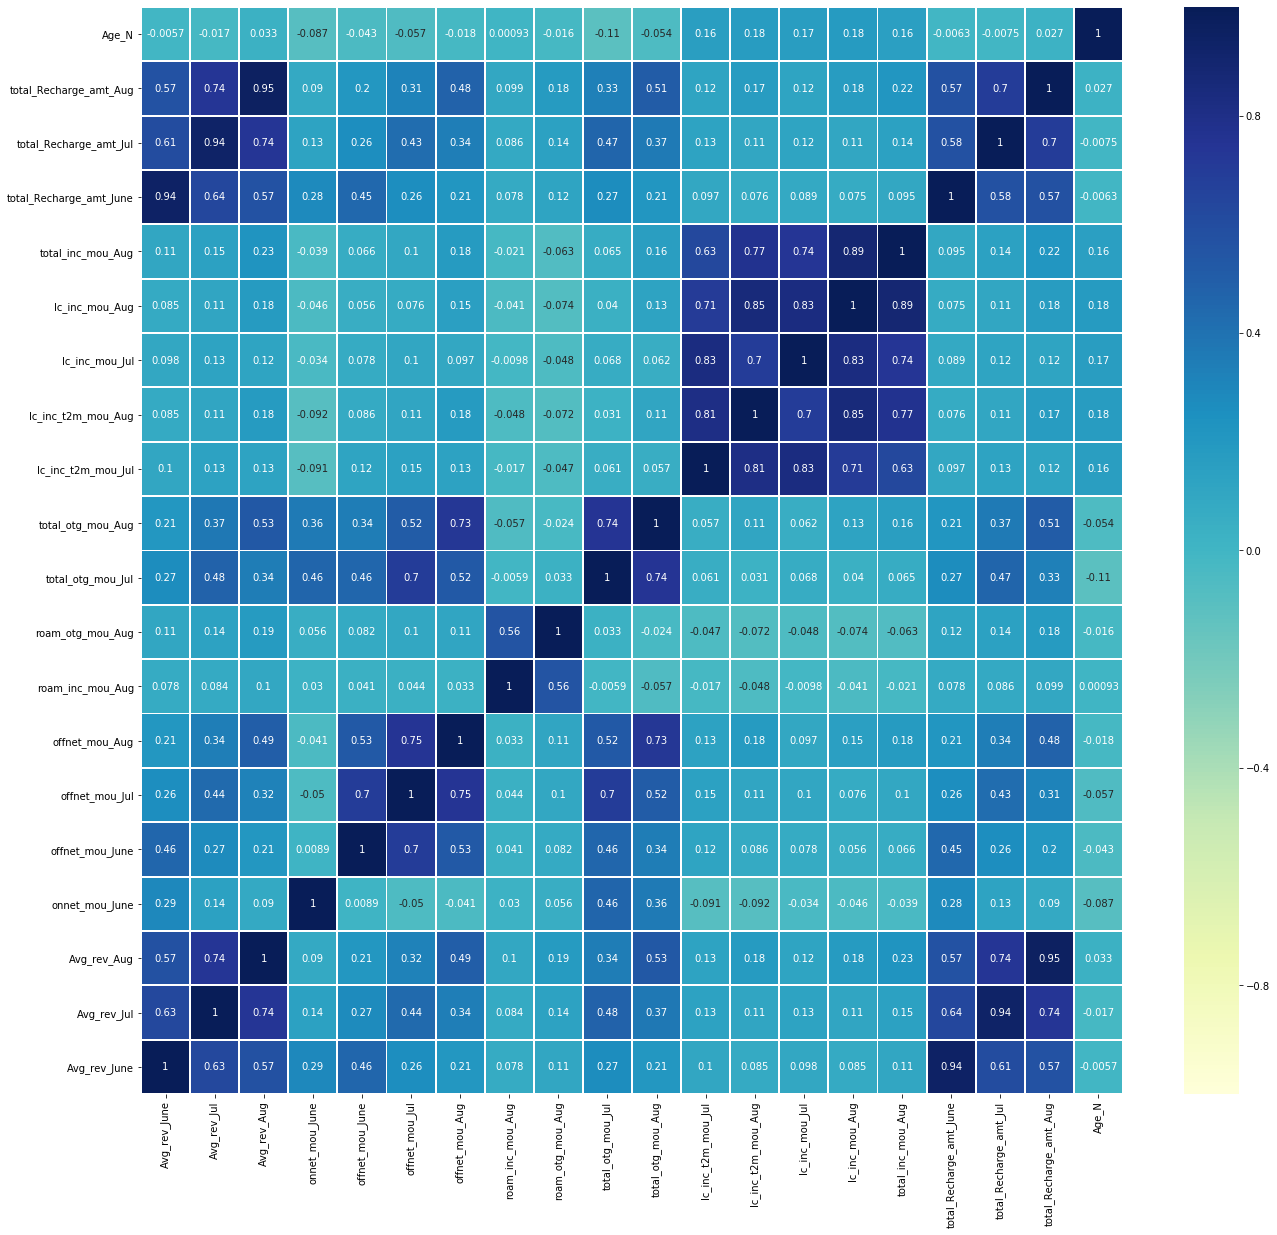

In [166]:
data_c = data_new.corr()   # Correlation of featurs.
fig, axes = plt.subplots(figsize=(22,20))   # Setting the figure size.
ax = sns.heatmap(data_c, vmin = -1, vmax = 1, annot = True, ax = axes, cmap="YlGnBu", linewidth=0.9) 
#plotting heat map with min to max range is -1 to 1.
ax.set_xlim(0,20)  # Setting xlimit to 10.
ax.set_ylim(0,20)  # Setting ylimit to 10.
plt.show()

# Conclusion from the graphs:
* 'total_Recharge_amt_June' and 'Avg_rev_June' has correlation of 0.94.
* 'total_Recharge_amt_Jul' and 'Avg_rev_Jul' has correlation of 0.94.
* 'total_Recharge_amt_Aug' and 'Avg_rev_Aug' has highest correlation of 0.95.
* 'Age_n' and 'roam_inc_mou_Aug' has lowest correlaion of 0.00093.
* 'Age_n' and 'total_Recharge_amt_Jul' has lowest correlation of -0.0075.

In [167]:
target=data_s["User_Active"]    # Determing the target variable 

In [168]:
train_x,test_x,train_y,test_y = train_test_split(data_new,target,test_size=0.30,random_state=1)

In [169]:
#  Using RandomForestClassifier with n_estimators or decision trees = 150

model=RandomForestClassifier(n_estimators=150,random_state=0)

In [170]:
model.fit(train_x,train_y)   # Training the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [171]:
model.score(test_x,test_y)   # Accuracy of the model

0.9390406395736176

In [172]:
y_predict=model.predict(test_x)  # Predicting values 

In [173]:
c_rd = confusion_matrix(test_y, y_predict)   # Confusion matrix

In [174]:
c_rd

array([[ 357,  436],
       [ 113, 8100]], dtype=int64)

In [175]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.45      0.57       793
         1.0       0.95      0.99      0.97      8213

    accuracy                           0.94      9006
   macro avg       0.85      0.72      0.77      9006
weighted avg       0.93      0.94      0.93      9006



Since, the recall value of the model is less than 0.5 so, we need to apply VIF so that we can drop some features to increase accuracy, recall or precision value.

In [176]:
vif_data = pd.DataFrame() 
vif_data["feature"] = data_new.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data_new.values, i) for i in range(len(data_new.columns))] 
  
print(vif_data)

                    feature         VIF
0              Avg_rev_June  206.843811
1               Avg_rev_Jul  175.923319
2               Avg_rev_Aug  124.183357
3            onnet_mou_June    3.638714
4           offnet_mou_June    5.179836
5            offnet_mou_Jul   13.178001
6            offnet_mou_Aug    9.433372
7          roam_inc_mou_Aug    1.515543
8          roam_otg_mou_Aug    1.675599
9         total_otg_mou_Jul   15.784125
10        total_otg_mou_Aug   12.506822
11       lc_inc_t2m_mou_Jul   12.212998
12       lc_inc_t2m_mou_Aug   13.324883
13           lc_inc_mou_Jul   14.368482
14           lc_inc_mou_Aug   21.347633
15        total_inc_mou_Aug    8.252720
16  total_Recharge_amt_June   13.116344
17   total_Recharge_amt_Jul   11.893831
18   total_Recharge_amt_Aug   20.714078
19                    Age_N    2.350621


In [177]:
data_new.drop('Avg_rev_June',axis=1,inplace=True)  # Dropping the Avg_rev_June column from the dataset

In [178]:
len(data_new.columns)

19

Now, we will train model with 19 columns as we have dropped column with maximum VIF value 

In [180]:
# Splitting data into training and testing set

train_x, test_x, train_y, test_y = train_test_split(data_new,target,test_size=0.25,random_state=1)

In [181]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [182]:
model.score(test_x,test_y)

0.94163890739507

In [186]:
y_pred = model.predict(test_x)

In [188]:
c_rd = confusion_matrix(test_y,y_pred)

In [189]:
c_rd

array([[ 313,  346],
       [  92, 6754]], dtype=int64)

In [190]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.47      0.59       659
         1.0       0.95      0.99      0.97      6846

    accuracy                           0.94      7505
   macro avg       0.86      0.73      0.78      7505
weighted avg       0.94      0.94      0.94      7505



Since, the value of recall value is less than 0.5 so, we have to again drop column with high VIF value to increase the recall value of the model. 

In [191]:
vif_data = pd.DataFrame() 
vif_data["feature"] = data_new.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data_new.values, i) for i in range(len(data_new.columns))] 
  
print(vif_data)

                    feature        VIF
0               Avg_rev_Jul  66.180573
1               Avg_rev_Aug  97.594472
2            onnet_mou_June   3.473020
3           offnet_mou_June   4.816097
4            offnet_mou_Jul  13.147765
5            offnet_mou_Aug   9.432397
6          roam_inc_mou_Aug   1.515415
7          roam_otg_mou_Aug   1.670122
8         total_otg_mou_Jul  15.559328
9         total_otg_mou_Aug  12.486267
10       lc_inc_t2m_mou_Jul  12.212854
11       lc_inc_t2m_mou_Aug  13.324883
12           lc_inc_mou_Jul  14.368431
13           lc_inc_mou_Aug  21.345745
14        total_inc_mou_Aug   8.251583
15  total_Recharge_amt_June   7.495811
16   total_Recharge_amt_Jul   8.142258
17   total_Recharge_amt_Aug  16.049274
18                    Age_N   2.345414


Since, the column Avg_rev_Aug has high VIF value so we can drop that column.

In [192]:
data_new.drop('Avg_rev_Aug',axis=1,inplace=True)  # Dropping the Avg_rev_Aug column from the dataset

In [193]:
# Splitting data into training and testing set

train_x, test_x, train_y, test_y = train_test_split(data_new,target,test_size=0.25,random_state=0)

In [194]:
#  Using RandomForestClassifier with n_estimators or decision trees = 150

model=RandomForestClassifier(n_estimators=150,random_state=0)

In [195]:
len(data_new.columns)

18

Now, we will train model with 18 columns.

In [196]:
model.fit(train_x,train_y)   # Training the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [197]:
model.score(test_x,test_y)  # Checking the accuracy of the model

0.9420386409060626

In [198]:
y_predict=model.predict(test_x)  # Predicting values 

In [199]:
c_rd = confusion_matrix(test_y, y_predict)   # Confusion matrix

In [200]:
c_rd

array([[ 323,  329],
       [ 106, 6747]], dtype=int64)

Conclusion of Confusion_Matrix:
* The model predicts '0' 323 times correctly and 329 times incorrectly.
* The model predicts '1' 106 times incorrectly and 6747 times correctly.

In [201]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60       652
         1.0       0.95      0.98      0.97      6853

    accuracy                           0.94      7505
   macro avg       0.85      0.74      0.78      7505
weighted avg       0.94      0.94      0.94      7505



By seeing the classification report we can say that:
* The Accuracy of the model is 94%.
* The Recall value of the model is 50 for 0.0 which is in the acceptable range.
* The Recall value of the model is 98 for 1.0 which is in the acceptable range.
* The Precision value of the model is 75 for 0.0 which in the acceptable range.
* The Precision value of the model is 95 for 1.0 which in the acceptable range.

***